In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/cyberlabs_google_colab/Colab Notebooks/Polynomial_train.csv'
df=pd.read_csv(file_path)
predict='label'
train_feature_value=df.loc[:,('X','Y','Z')]
y_true=df[[predict]]


In [ ]:
case = []  # this function will help me to get all possible power combinations
all_cases=[]

def find_cases(value_sum, numb_features, all_cases=[]):
    if numb_features == 1:
        case.append(value_sum)
        all_cases.append(case.copy())
        case.pop()
        return None
    else:
        for element_value in range(value_sum+1):
            case.append(element_value)
            find_cases(
                value_sum-element_value, numb_features-1, all_cases)
            case.pop()
    # print('alll casesss', all_cases)

    return all_cases


def all_powers(max_degree, numb_features):
    deg_val = []
    for degree in range(1, max_degree+1):
        deg_val=find_cases(value_sum=degree, numb_features=numb_features)
    return deg_val



deg_val = all_powers(max_degree=2, numb_features=3)


In [ ]:
def standardize(feature_value:np.array):
    value = (feature_value-np.mean(feature_value, axis=0))/np.std(feature_value, axis=0)
    return value
    
def cost(y_predicted: np.array, y_true: np.array):
    m=y_predicted.shape[0]
    value=np.sum((y_predicted-y_true)**2)
    return np.sqrt(value/(2*m))


def poly_features(data_set: pd.DataFrame, max_degree: int, numb_features:int):
    x = np.array(data_set[['X']])
    y = np.array(data_set[['Y']])
    z = np.array(data_set[['Z']])
    data_set_array =np.empty(shape=(x.shape[0], len(deg_val)))
    pos=0
    for pwr in deg_val:
        new_array = (x**(pwr[0]))*(y**(pwr[1]))*(z**(pwr[2]))
        data_set_array[:,pos]=new_array.ravel()
        pos+=1
    
    # print(data_set_array)
    return data_set_array


def gradient_desc(input_array: np.array, y_true: np.array, learning_rate=0.001, max_iter=300):
    numb_of_rows, numb_features = input_array.shape
    parameters = np.ones(shape=(numb_features, 1))
    iter_pos = 0
    bias=0
    while iter_pos < max_iter:
        y_predicted = np.dot(input_array, parameters) +bias
        y_error = y_predicted-y_true
        matrix_prod = np.dot(y_error.T, input_array)
        parameters -= matrix_prod.T*(learning_rate/(2*numb_of_rows))
        bias -= np.sum(y_error)*(learning_rate/(2*numb_of_rows))
        iter_pos += 1
        y_points.append(cost(np.dot(input_array, parameters)+bias, y_true))
        # cf_val = (
        #     (np.sum(np.square(np.dot(input_array, parameters)-y_true), axis=0))/numb_of_rows)**0.5
    return parameters, bias



In [ ]:
train_poly_value = poly_features(train_feature_value, max_degree=2, numb_features=3)


In [ ]:
mean_data_set = np.mean(train_poly_value, axis=0)
std_data_set = np.std(train_poly_value, axis=0)

In [ ]:
scaled_train_poly_value = standardize(train_poly_value)
x_points = []
y_points = []


In [ ]:
parameters, bias = gradient_desc(scaled_train_poly_value, np.array(
    y_true), learning_rate=0.3, max_iter=500)


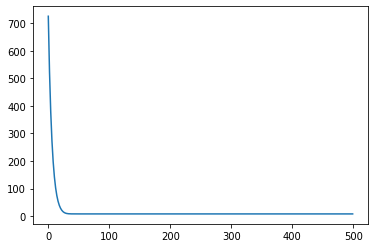

In [ ]:
plt.plot([i for i in range(0, len(y_points))], y_points)
plt.show()

In [ ]:
print(y_points[-1])

8.089050035073903


In [ ]:
test_df = pd.read_csv(
    '/content/drive/MyDrive/cyberlabs_google_colab/Colab Notebooks/Polynomial_test.csv')

test_feature_value = test_df.loc[:, ('X', 'Y', 'Z')]
test_y = test_df[[predict]]
test_poly_feature_value = (poly_features(test_feature_value, max_degree=2, numb_features=3))

scaled_test_poly_feature_value = (
    test_poly_feature_value-mean_data_set)/(std_data_set)



In [ ]:
y_predicted = np.dot(scaled_test_poly_feature_value, parameters)+bias

In [ ]:
cost(y_predicted=y_predicted, y_true=np.array(test_y))


1.27828038383084